In [1]:
from __future__ import print_function

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
df_train = pd.read_csv('train.csv')
df_train = df_train.iloc[:, 1:]
df_train.replace({'Sex':{'male':0,'female':1}, 'Name':{'Mr':-1,'Mrs':1,'Master':-0.5,'Miss':0.5}}, inplace=True)
df_train.Age = df_train.Age/df_train.Age.mean()
df_train.Fare = df_train.Fare/df_train.Fare.mean()

In [3]:
df_test = pd.read_csv('test.csv')
df_test = df_test.iloc[:, 1:]
df_test.replace({'Sex':{'male':0,'female':1}, 'Name':{'Mr':-1,'Mrs':1,'Master':-0.5,'Miss':0.5}}, inplace=True)
df_test.Age = df_test.Age/df_test.Age.mean()
df_test.Fare = df_test.Fare/df_test.Fare.mean()

In [4]:
x_train = df_train.drop('Survived', axis=1).values
y_train = df_train.Survived.values.reshape(720,1)
x_test = df_test.drop('Survived', axis=1).values
y_test = df_test.Survived.values.reshape(171,1)

In [5]:
n_samples = x_train.shape[0]
n_attrib = x_train.shape[1]
batch_size = 10
n_epochs = 6000
display_epoch = 300
learning_rate = 1e-1

weights = np.random.rand(n_attrib,1)
bias = 1.0

def activate(x):
    return 1/(1+np.exp(-x))

ep, ls, ac = [], [], []

for epoch in range(1,n_epochs+1):
    
    output = activate(np.dot(x_train, weights)+bias)
    loss = -((y_train * np.log(output))+((1-y_train)* np.log(1-output)))
    cost = np.sum(abs(output-y_train))
    weights -= (learning_rate/n_samples) * (np.dot(x_train.T, (output-y_train)))
    bias -= (learning_rate/n_samples) * (sum(output-y_train))
    
    if epoch==1 or epoch%display_epoch == 0:
        
        print ('Epoch: %04d'% (epoch), ' Cost:{0:.5f}'.format(cost))
        ep.append(epoch)
        ls.append(cost)
        pred = activate(np.dot(x_test,weights)+ bias)
        pred = np.round(pred)
        acc = np.mean(np.equal(pred, y_test))
        ac.append(acc)

print ('Optimized !!')

Epoch: 0001  Cost:401.62627
Epoch: 0300  Cost:212.78475
Epoch: 0600  Cost:210.87449
Epoch: 0900  Cost:209.62256
Epoch: 1200  Cost:208.55457
Epoch: 1500  Cost:207.62437
Epoch: 1800  Cost:206.81326
Epoch: 2100  Cost:206.10500
Epoch: 2400  Cost:205.48492
Epoch: 2700  Cost:204.94019
Epoch: 3000  Cost:204.45978
Epoch: 3300  Cost:204.03430
Epoch: 3600  Cost:203.65581
Epoch: 3900  Cost:203.31757
Epoch: 4200  Cost:203.01389
Epoch: 4500  Cost:202.73996
Epoch: 4800  Cost:202.49170
Epoch: 5100  Cost:202.26563
Epoch: 5400  Cost:202.05881
Epoch: 5700  Cost:201.86874
Epoch: 6000  Cost:201.69327
Optimized !!


In [6]:
print (weights)
print (bias)

[[-1.03475549]
 [ 1.51091033]
 [ 0.22774165]
 [-1.03762497]
 [-0.3206671 ]
 [-0.26661792]
 [ 0.08288749]]
[3.47208902]


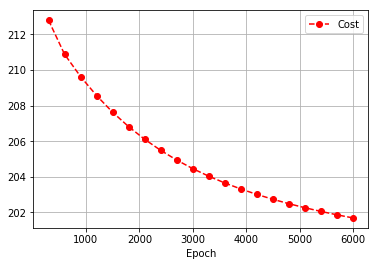

In [7]:
plt.plot(ep[1:], ls[1:], 'ro--', label='Cost')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

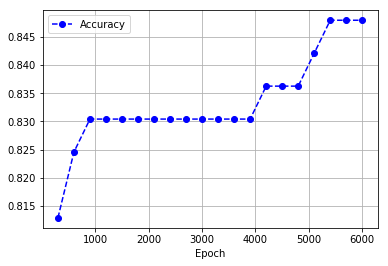

In [8]:
plt.plot(ep[1:], ac[1:], 'bo--', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

In [9]:
print ("Final Test Accuracy:", acc)

Final Test Accuracy: 0.847953216374269
